In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

Langkah pertama yang dilakukan adalah meload dataset yang akan digunakan, dalam projek kali ini akan menggunakan dataset dengan tema anime atau kartun dari negara jepang

In [ ]:
anime = pd.read_csv('/content/anime.csv')
rating = pd.read_csv('/content/rating.csv')

Masing masing dataset diberi nama sesuai dengan nama dataset untuk mempermudah langkah selanjutnya

Dataset dengan nama anime memiliki kolom anime_id, name, genre, type, episodes, rating, dan members

In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Dataset dengan nama rating memiliki kolom user_id, anime_id, dan rating

In [ ]:
print('Jumlah data anime: ', len(anime.name.unique()))
print('Jumlah data rating: ', len(rating.user_id.unique()))

Jumlah data anime:  12292
Jumlah data rating:  73515


Dapat disimpulkan dataset memiliki jumlah judul anime sebanyak 12292 dan jumlah user sebanyak 73515

# EDA

## Anime

### Deskripsi Variabel

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Variabel pada data anime:
- anime_id : Index setiap anime
- name : Judul anime
- genre : Genre anime
- type : Jenis penyiaran
- episodes : Jumlah episode
- rating : Rating anime
- Members : Jumlah member yang bergabung ke dalam komunitas

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Berdasarkan output diatas dapat disimpulkan dataset anime memiliki entri sebanyak 12294. Namun terdapat null value di beberapa variabel. Tindakan cleaning data perlu dilakukan.

### Univariate Analysis

Untuk dapat melihat berapa jumlah judul anime dengan yang bersifat unik maka akan menggunakan unique()

In [ ]:
print('Jumlah anime: ', len(anime.name.unique()))

Jumlah anime:  12292


Berikut kode yang akan menampilkan distribusi data rating pada data anime, untuk melihat trend dan konsentrasi di nilai tertentu

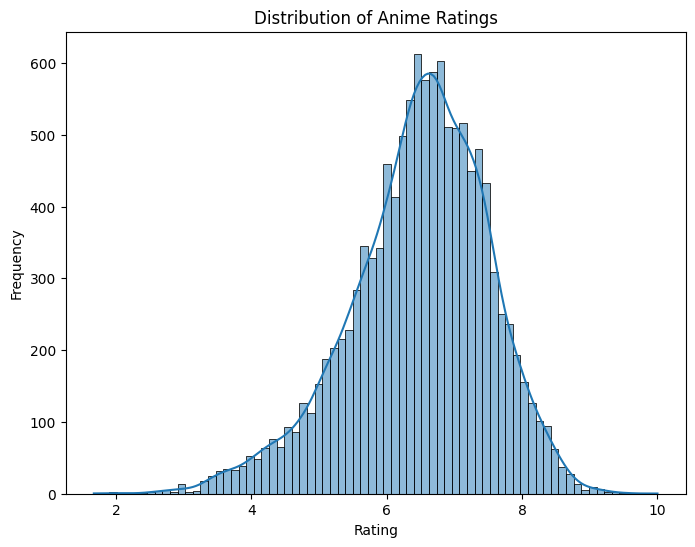

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(anime['rating'].dropna(), kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
max_rating = rating['rating'].max()
mean_rating = rating['rating'].mean()
min_rating = rating['rating'].min()

print(f"Max Rating: {max_rating}")
print(f"Mean Rating: {mean_rating}")
print(f"Min Rating: {min_rating}")

Max Rating: 10
Mean Rating: 6.144029546937656
Min Rating: -1


Dapat disimpulkan rating memiliki nilai dari rentang -1 sampai 10, rata-rata rating yang diberikan ada di angka 6 sedangkan rating paling minimum adalah -1 dimana nilai -1 meiliki makna member tidak memberikan nilai walaupun sudah menonton anime tersebut.

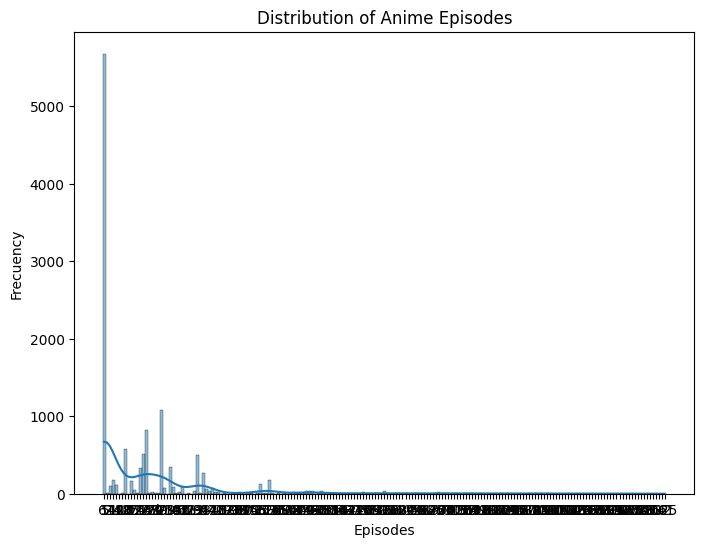

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(anime['episodes'].dropna(), kde=True, orientation='vertical')
plt.title('Distribution of Anime Episodes')
plt.ylabel('Frecuency')
plt.xlabel('Episodes')
plt.show()

In [ ]:
print('Jumlah episode anime: ', len(anime.episodes.unique()))

Jumlah episode anime:  187


In [ ]:
top_10_episodes = anime['episodes'].value_counts().nlargest(10)
top_10_episodes

,count
episodes,
1,5677
2,1076
12,816
13,572
26,514
3,505
Unknown,340
4,327
6,268


Anime mayoritas memiliki episode 1 yang mana anime episode 1 adalah anime dengan jenis penyiaran movie

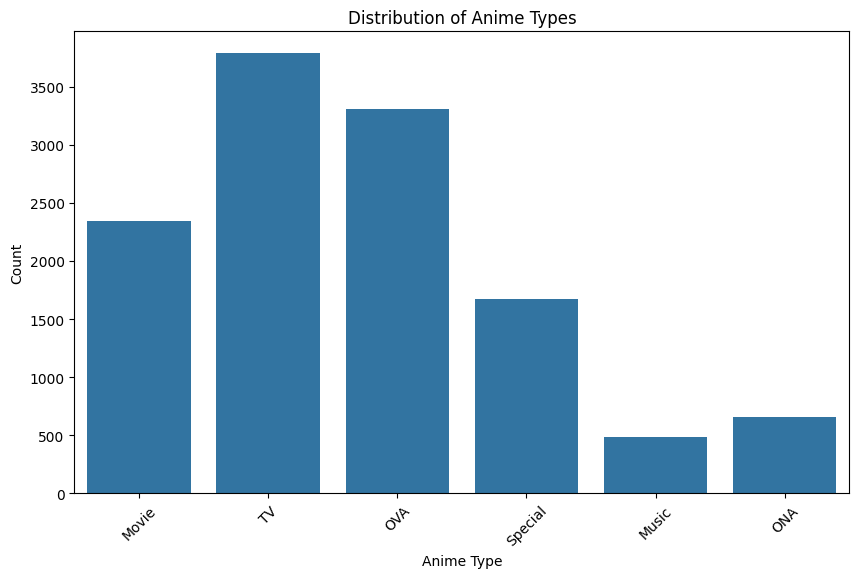

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=anime)
plt.title('Distribution of Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dari distribusi tipe penyiaran anime, tipe anime yang jumlahnya paling banyak adalah TV.

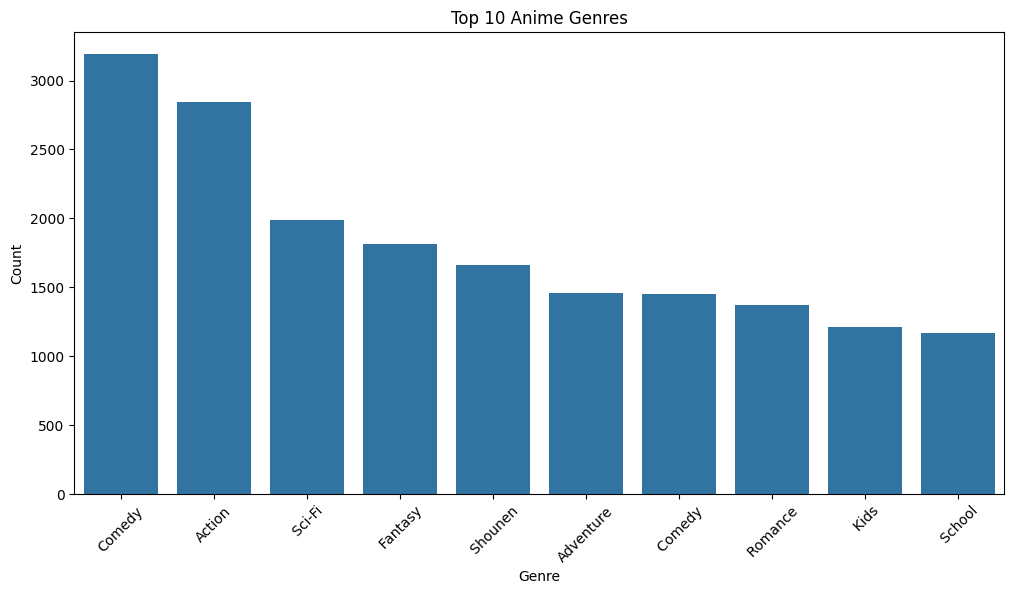

In [ ]:
genre_counts = anime['genre'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dari distribusi diatas dapat disimpulkan bahwa genre comedy menjadi genre paling terbanyak dalam anime. Karena genre anime memiliki variasi yang bagus maka dalam merekomendasikan anime nantinya akan memberikan akurasi yang tinggi bagi pengguna sistem rekomendasi.

In [ ]:
unique_genres = []
for index in anime.index:
    genres = anime.loc[index, 'genre']
    if isinstance(genres, str):
      for genre in genres.split(','):
        genre = genre.strip()
        if genre not in unique_genres:
          unique_genres.append(genre)

print("Jumlah unik genre:", len(unique_genres))

Jumlah unik genre: 43


In [ ]:
top_10_members = anime.sort_values(by='members', ascending=False).head(10)
top_10_members

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


Death Note menjadi anime yang paling populer dikarenakan jumlah membersnya paling banyak diantara judul anime lainnya.

### Multivariate Analysis

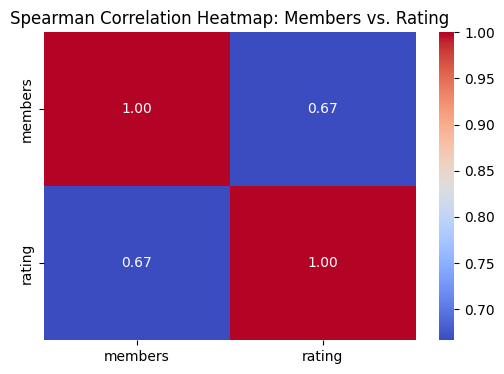

In [ ]:
members_rating_corr = anime['members'].corr(anime['rating'], method='spearman')
plt.figure(figsize=(6, 4))
sns.heatmap(anime[['members', 'rating']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap: Members vs. Rating')
plt.show()

Fitur rating dan members memiliki skor korelasi yang cukup tinggi yaitu diatas 50%. Hal ini masuk akal dikarenakan anime dengan rating yang tinggi kebanyakan memiliki jumlah members yang tinggi juga. Semakin tinggi rating maka akan semakin populer anime tersebut. Banyak dari platform situs streaming online anime, anime dengan rating paling tinggi selalu ditampilkan di halaman pertama yang menunjukan rating dijadikan sebagai variabel rekomendasi non-personalized kebanyakan platform streaming anime.

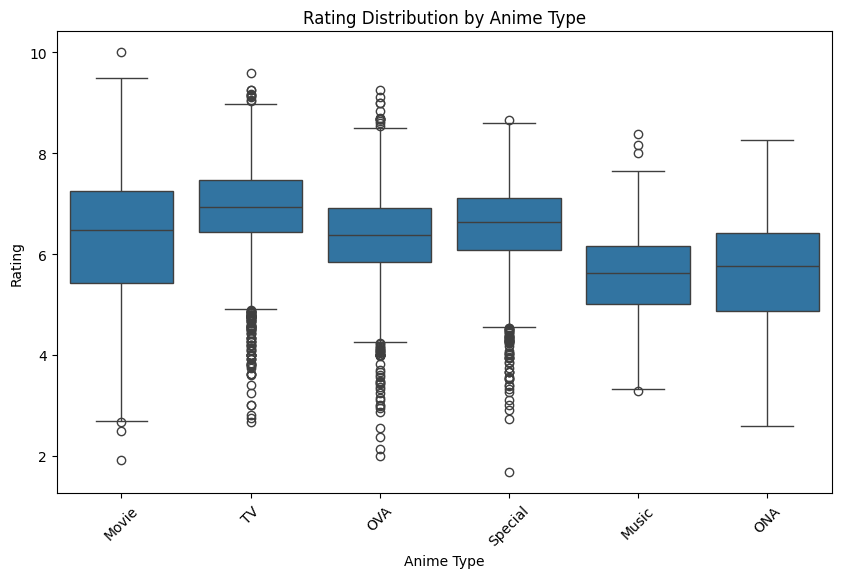

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=anime)
plt.title('Rating Distribution by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

- Anime dengan tipe Movie dan TV cenderung mendapatkan rating yang lebih tinggi dan lebih konsisten dibandingkan tipe lainnya.
- Anime dengan tipe Music cenderung mendapatkan rating yang lebih rendah.
- Tipe OVA, Special, dan ONA memiliki variasi rating yang lebih besar dan cenderung memiliki beberapa anime dengan rating yang sangat rendah.
- Keberadaan outlier menunjukkan adanya beberapa anime dengan rating yang sangat tinggi atau sangat rendah di setiap tipe.

### Data Preparation

#### Cleaning Data

Menanggani missing value adalah hal yang tepat untuk mengembangkan model yang akurat. Sebelum menangganinya, penting untuk mencari baris data yang bernilai null.

In [ ]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0
first_genre,0


Berdasarkan informasi diatas, genre, type, dan rating memiliki nilai null. Langkah yang paling tepat menanggani missing value dalam proyek ini adalah menghapusnya. Alasannya adalah untuk meminimalkan sistem rekomendasi bias pada ke variabel tertentu. Baris yang dihapus hanyalah baris yang memiliki value null di fitur genre. Karena genre akan digunakan sebagai item di sistem content based filtering


In [ ]:
anime.dropna(subset=['genre'], inplace=True)

In [ ]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,22
episodes,0
rating,215
members,0
first_genre,0


Baris data dengan missing value di fitur genre berhasil dihapus.

Selain missing value, drop data yang duplikat juga akan membuat model lebih akurat. Namun penangganannya harus diperhatikan. Agar setiap baris data anime mewakilkan satu judul anime. Maka hal yang paling tepat adalah menghapus data dupliat hanya pada fitur name.

In [ ]:
anime.drop_duplicates('name')

,anime_id,name,genre,type,episodes,rating,members,first_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Action
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Sci-Fi
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Action
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,Hentai
12290,5543,Under World,Hentai,OVA,1,4.28,183,Hentai
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,Hentai
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,Hentai


In [ ]:
anime.shape

(12232, 8)

Dari proses membersihkan data yang duplikat dan memiliki value null dataset anime memiliki entri sebanyak 12294

#### Feature Engineering

Dataset anime akan digunakan dalam model content based filtering berdasarkan genre tiap judul anime. Oleh karena itu, dalam pengembangan modelnya hanya membutuhkan anime_id, name, dan genre.

In [ ]:
cbf_anime = anime[['anime_id', 'name', 'genre']]
cbf_anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


In [ ]:
cbf_anime.loc[cbf_anime['genre'].str.contains('Sci-Fi', na=False), 'genre'] = cbf_anime['genre'].str.replace('Sci-Fi', 'scifi')
cbf_anime.loc[cbf_anime['genre'].str.contains('Slice of Life', na=False), 'genre'] = cbf_anime['genre'].str.replace('Slice of Life', 'sliceoflife')

cbf_anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, s..."
3,9253,Steins;Gate,"scifi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, s..."


Penggunaan `TfidfVectorizer` dari scikit-learn untuk memproses genre anime, input yang paling umum dan efisien adalah list string (di mana setiap string mewakili genre anime). Maka perlu dilakukan pengoversian data ke bentuk list.

In [ ]:
# Mengonversi data series ‘anime_id’ menjadi dalam bentuk list
anime_id = cbf_anime['anime_id'].tolist()

# Mengonversi data series 'name' menjadi dalam bentuk list
anime_name = cbf_anime['name'].tolist()

# Mengonversi data series 'genre' menjadi dalam bentuk list
anime_genre = cbf_anime['genre'].tolist()

# Content Based Filtering

In [ ]:
# Membuat dictionary untuk data , 'anime_id', 'name', 'genre'
fix_anime = pd.DataFrame({
    'id': anime_id,
    'name': anime_name,
    'genre': anime_genre
})
fix_anime.head()

,id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, s..."
3,9253,Steins;Gate,"scifi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, s..."


## One-Hot Encoding

Sebelum menggunakan `TfidfVectorizer` untuk processing fitur, perlu dilakukannya one-hot encoding atau mengubah fitur kategori ke fitur numerik. Output dari hadil one-hot encoding adalah kolom fitur genre anime dengan nilai dari 0-1.

In [ ]:
genre_list = []

# Membuat daftar genre unik
for index in fix_anime.index:
    temp = fix_anime['genre'][index].split(',')
    for i in temp:
        if i not in genre_list:
            genre_list.append(i)

onehot_df = pd.DataFrame(0, index=fix_anime.index, columns=genre_list)

# Mengisi nilai 1 untuk genre yang sesuai
for index in fix_anime.index:
    temp = fix_anime['genre'][index].split(',')
    for i in temp:
        onehot_df.loc[index, i] = 1

fix_anime = pd.concat([fix_anime, onehot_df], axis=1).fillna(0)
print(fix_anime.head())

      id                              name  \
0  32281                    Kimi no Na wa.   
1   5114  Fullmetal Alchemist: Brotherhood   
2  28977                          Gintama°   
3   9253                       Steins;Gate   
4   9969                     Gintama&#039;   

                                               genre  Drama   Romance  \
0               Drama, Romance, School, Supernatural      1         1   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...      0         0   
2  Action, Comedy, Historical, Parody, Samurai, s...      0         0   
3                                    scifi, Thriller      0         0   
4  Action, Comedy, Historical, Parody, Samurai, s...      0         0   

    School   Supernatural  Action   Adventure   Drama  ...  Supernatural  \
0        1              1       0           0       0  ...             0   
1        0              0       1           1       1  ...             0   
2        0              0       1           0       0  .

## TF-IDF Vectorizer

Kode ini mengubah data genre anime dari representasi teks menjadi representasi numerik menggunakan metode TF-IDF. TF-IDF memberikan bobot pada setiap term dalam setiap dokumen, dengan mempertimbangkan frekuensi term dalam dokumen tersebut (TF) dan seberapa langka term tersebut di seluruh dokumen (IDF). Hasilnya adalah representasi numerik dari genre anime yang dapat digunakan sebagai input untuk model machine learning.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(fix_anime['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'power', 'psychological', 'romance', 'samurai', 'school', 'scifi',
       'seinen', 'shoujo', 'shounen', 'sliceoflife', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(fix_anime['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(12232, 44)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29450574, 0.31749916, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.26112763, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=fix_anime.name
).sample(22, axis=1).sample(10, axis=0)

,power,military,ai,adventure,samurai,supernatural,historical,josei,sliceoflife,romance,...,music,arts,martial,action,shounen,super,parody,school,comedy,hentai
name,,,,,,,,,,,,,,,,,,,,,
Choujin Locke: Mirror Ring,0.602484,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.347034,0.0,0.602484,0.0,0.000000,0.000000,0.0
Sora no Manimani Specials,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.651672,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.651672,0.388134,0.0
Ginga Kikoutai Majestic Prince,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.285467,0.0,0.000000,0.0,0.383739,0.000000,0.0
Kakumeiki Valvrave 2nd Season,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.395302,0.0,0.000000,0.0,0.000000,0.000000,0.0
GA: Geijutsuka Art Design Class,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.506473,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.506473,0.301654,0.0
Seikatsu Shidou!! Anime Edition,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
Gantz,0.000000,0.0,0.0,0.0,0.0,0.391049,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.277280,0.0,0.000000,0.0,0.000000,0.000000,0.0
Steins;Gate Movie: Fuka Ryouiki no Déjà vu,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
To Heart 2 AD Plus,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


## Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14778251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14778251, 1.        , 0.18609923, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18609923, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

- `from sklearn.metrics.pairwise import cosine_similarity:` Baris ini mengimpor fungsi cosine_similarity dari modul metrics.pairwise dalam library scikit-learn. Fungsi ini digunakan untuk menghitung similaritas kosinus antara dua matriks atau vektor.

- `cosine_sim = cosine_similarity(tfidf_matrix)`: Baris ini adalah inti dari perhitungan similaritas kosinus.

  - `cosine_similarity(tfidf_matrix)`: Fungsi ini menerima sebuah matriks sebagai input, dalam hal ini tfidf_matrix. tfidf_matrix diasumsikan sebagai matriks TF-IDF yang dihasilkan sebelumnya menggunakan TfidfVectorizer. Setiap baris dalam matriks ini merepresentasikan sebuah dokumen (dalam konteks sebelumnya, mungkin sebuah anime), dan setiap kolom merepresentasikan sebuah term (kata atau n-gram). Nilai dalam matriks adalah bobot TF-IDF untuk setiap term dalam setiap dokumen.
  - Fungsi `cosine_similarity` menghitung similaritas kosinus antara semua pasangan baris dalam matriks tfidf_matrix.
  - `cosine_sim`: Hasil dari cosine_similarity disimpan dalam variabel `cosine_sim`. cosine_sim akan berupa matriks persegi. Ukuran matriks ini adalah N x N, di mana N adalah jumlah dokumen (jumlah baris dalam tfidf_matrix). Setiap elemen cosine_sim[i][j] berisi similaritas kosinus antara dokumen i dan dokumen j.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=fix_anime['name'], columns=fix_anime['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12232, 12232)


name,Brave 10,Sentou Mecha Xabungle,Gaza: Changing the World,Tales of Zestiria the X: Saiyaku no Jidai,Hello Kitty no Kieta Santa-san no Okurimono
name,,,,,
Mamoru-kun ni Megami no Shukufuku wo!,0.000000,0.000000,0.000000,0.000000,0.000000
Robot Carnival,0.000000,0.289165,0.000000,0.509391,0.000000
Bishoujo Senshi Sailor Moon: Sailor Stars - Hero Club,0.083181,0.000000,0.218276,0.242942,0.000000
Doudou,0.000000,0.000000,0.000000,0.735287,0.000000
Karasu Tengu Kabuto,0.436149,0.000000,0.298883,0.282637,0.000000
Cyborg 009: Chou Ginga Densetsu,0.099513,0.191755,0.000000,0.287003,0.000000
X Bomber,0.157912,0.372240,0.000000,0.210627,0.382791
Himitsukessha Taka no Tsume THE PLANETARIUM: Burabura! Black Hole no Nazo,0.094771,0.000000,0.000000,0.000000,0.000000
Rockman.EXE Stream,0.139589,0.467545,0.000000,0.186187,0.000000


## Euclidean Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_sim = euclidean_distances(tfidf_matrix)
euclidean_sim

euclidean_sim_df = pd.DataFrame(euclidean_sim, index=fix_anime['name'], columns=fix_anime['name'])
print('Shape:', euclidean_sim_df.shape)

euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12232, 12232)


name,Project A-Ko 4: Final,Nekogami Yaoyorozu,Sakura Taisen: Ouka Kenran,Shakugan no Shana Specials,Jungle wa Itsumo Hare nochi Guu Final
name,,,,,
Akiba Kei Kanojo,1.414214,1.414214,1.414214,1.414214,1.414214
Bakuon!!,1.353300,0.545286,1.414214,1.309278,0.795397
Gamba to Kawauso no Bouken,1.414214,1.414214,1.190844,1.414214,1.414214
Spoon-hime no Swing Kitchen,1.414214,1.414214,1.190844,1.414214,1.414214
Mizugi Kanojo: The Animation,1.414214,1.414214,1.414214,1.414214,1.414214
Uchuujin Tanaka Tarou,1.343069,1.325711,1.186727,1.291294,1.258321
Aikatsu! Movie,1.414214,1.239182,1.414214,1.414214,1.096384
School Days ONA,1.414214,1.414214,1.414214,1.414214,1.414214
Initial D Battle Stage,1.356340,1.202961,1.414214,1.414214,1.414214


1. `from sklearn.metrics.pairwise import euclidean_distances`: Baris ini mengimpor fungsi euclidean_distances dari sklearn.metrics.pairwise. Fungsi ini digunakan untuk menghitung jarak Euclidean antar baris dalam sebuah matriks.

2. `euclidean_sim = euclidean_distances(tfidf_matrix)`: Baris ini menghitung jarak Euclidean.
  - `euclidean_distances(tfidf_matrix)`: Fungsi ini mengambil matriks TF-IDF (`tfidf_matrix`) sebagai input. Sama seperti sebelumnya, matriks ini merepresentasikan dokumen (anime) sebagai vektor dalam ruang TF-IDF.
  - Fungsi ini menghitung jarak Euclidean antara setiap pasangan baris dalam `tfidf_matrix`. Jarak Euclidean mengukur "jarak garis lurus" antara dua titik dalam ruang vektor.
  - `euclidean_sim`: Hasilnya disimpan dalam variabel euclidean_sim. Ini akan berupa matriks persegi N x N, di mana N adalah jumlah dokumen. euclidean_sim[i][j] berisi jarak Euclidean antara dokumen i dan dokumen j.
3. `euclidean_sim_df = pd.DataFrame(euclidean_sim, index=fix_anime['name'], columns=fix_anime['name'])`: Baris ini mengubah matriks jarak Euclidean menjadi DataFrame Pandas.
  - `pd.DataFrame(euclidean_sim, ...):` Ini membuat DataFrame baru dari matriks `euclidean_sim.`
`index=fix_anime['name']`: Ini menetapkan indeks baris DataFrame menggunakan nama anime dari kolom 'name' di DataFrame fix_anime. Ini sangat berguna karena sekarang kita dapat mengakses jarak berdasarkan nama anime, bukan hanya indeks numerik.
`columns=fix_anime['name']`: Ini menetapkan nama kolom DataFrame juga menggunakan nama anime.
print('Shape:', euclidean_sim_df.shape): Baris ini mencetak dimensi (shape) dari DataFrame euclidean_sim_df. Ini akan menampilkan jumlah baris dan kolom, yang keduanya akan sama dengan jumlah anime.

3. `euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)`: Baris ini menampilkan sampel acak dari DataFrame.
  - `.sample(5, axis=1)`: Ini memilih 5 kolom (anime) secara acak. axis=1 menunjukkan bahwa kita memilih kolom.
  - `.sample(10, axis=0)`: Ini kemudian memilih 10 baris (anime) secara acak dari hasil pemilihan kolom sebelumnya. axis=0 menunjukkan bahwa kita memilih baris.
  - Rangkaian `.sample()` ini menghasilkan tampilan sebagian kecil dari DataFrame, yang berguna untuk memeriksa beberapa nilai tanpa harus melihat seluruh matriks yang mungkin sangat besar.

## Mendapatkan Rekomendasi

In [ ]:
cbf_anime[cbf_anime.name.eq('Naruto')]

,anime_id,name,genre
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."


In [ ]:
def anime_cosine(nama_anime, similarity_data=cosine_sim_df, items=fix_anime[['name', 'genre']], k=10):
    """
    Rekomendasi Anime berdasarkan kemiripan Genre

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kakan diambil dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# Mendapatkan rekomendasi anime yang mirip
anime_cosine('Naruto')

,name,genre
0,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
5,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
6,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."
7,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P..."
8,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power"
9,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe..."


Dari kesepuluh anime yang direkomendasikan, semuanya relevan dan memiliki genre yang mirip, bisa disimpulkan nilai precisionnya seperti berikut:
```
P = 10 / 10
p = 1
```
Model memiliki keakuratan yang sangat akurat dalam merekomendasikan anime berdasarkan genre.

In [ ]:
def anime_euclidean(nama_anime, similarity_data=euclidean_sim_df, items=fix_anime[['name', 'genre']], k=10):
    """
    Rekomendasi Anime berdasarkan jarak Euclidean

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, k akan diambil dengan nilai Euclidean distance terkecil
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(range(k))

    # Mengambil data dengan Euclidean distance terkecil dari index yang ada
    closest = similarity_data.columns[index[:k]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    # Membuat DataFrame hasil
    result_euclidean = pd.DataFrame(closest).merge(items).head(k)

    # Return DataFrame hasil
    return result_euclidean

In [ ]:
anime_euclidean('Naruto')

,name,genre
0,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P..."
6,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P..."
8,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power"


Dari kesepuluh anime yang direkomendasikan, semuanya relevan dan memiliki genre yang mirip, bisa disimpulkan nilai precisionnya seperti berikut:
```
P = 10 / 10
p = 1
```
Model memiliki keakuratan yang sangat akurat dalam merekomendasikan anime berdasarkan genre.